<a href="https://colab.research.google.com/github/mrinalinimurugan/Tensorflow-with-Keras/blob/main/02_tensorflow_neuralnetworkclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Introduction to neural network classification with Tensorflow

#Creating data to view and fit 
from sklearn.datasets import make_circles

#Make 1000 examples
nsamples = 1000

#Create circles
x,y =make_circles(nsamples,
                  noise = 0.03,
                  random_state=42)

#Check our features
x


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:,0], "X1":x[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


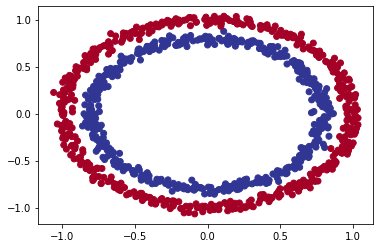

In [ ]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
#Input and output shapes

x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
len(x),len(y)

(1000, 1000)

In [ ]:
x[150],y[150]

(array([-0.20057293,  0.7585129 ]), 1)

In [ ]:
#Steps in modelling
import tensorflow as tf
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1)
])

model1.compile(loss = tf.keras.losses.BinaryCrossentropy() ,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
#Lets improve our model
model1.fit(x,y,epochs=200,verbose=0)
model1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
#Lets increase the dense layer
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy() ,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model2.fit(x, y, epochs=100,verbose=0)

In [ ]:
model2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
#Improve our model

tf.random.set_seed(42)

model3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

model3.compile(loss = tf.keras.losses.BinaryCrossentropy() ,
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model3.fit(x, y, epochs=100,verbose=0)

model3.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [ ]:
xmin,xmax = x[:,0].min()-0.1,x[:,0].max()+0.1
ymin,ymax = x[:,1].min()-0.1,x[:,1].max()+0.1
xmin,xmax,ymin,ymax

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
#Visualize our predictions

import numpy as np
def plot_decision_boundary(model,x,y):
  #Define axis boundaries
  xmin,xmax = x[:,0].min()-0.1,x[:,0].max()+0.1
  ymin,ymax = x[:,1].min()-0.1,x[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(xmin,xmax,100),
                      np.linspace(ymin,ymax,100))
  
  xin = np.c_[xx.ravel(),yy.ravel()]
  
#MAke predictions
  ypred = model.predict(xin)

#Check for multi-class
  if len(ypred[0])>1:
    print("doing multiclass classification")
    ypred = np.argmax(ypred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    ypred=np.round(ypred).reshape(xx.shape)

#Plot the decision boundary
  plt.contourf(xx,yy,ypred,cmap = plt.cm.RdYlBu,alpha = 0.7)
  plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


doing binary classification


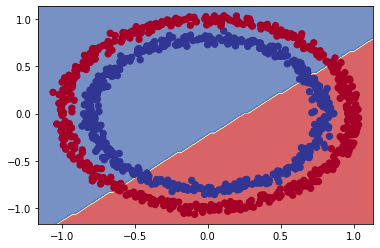

In [ ]:
plot_decision_boundary(model=model3,x=x,y=y)

In [ ]:
#lets check if model is helpful for regression prob
tf.random.set_seed(42)
xreg = tf.range(0,1000,5)
yreg = tf.range(100,1100,5)



xregtrain = xreg[:150]
xregtest = xreg[150:]
yregtrain = yreg[:150]
yregtest = yreg[150:]
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

model3.compile(loss = tf.keras.losses.mae ,
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["mae"])


model3.fit(xregtrain,yregtrain,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

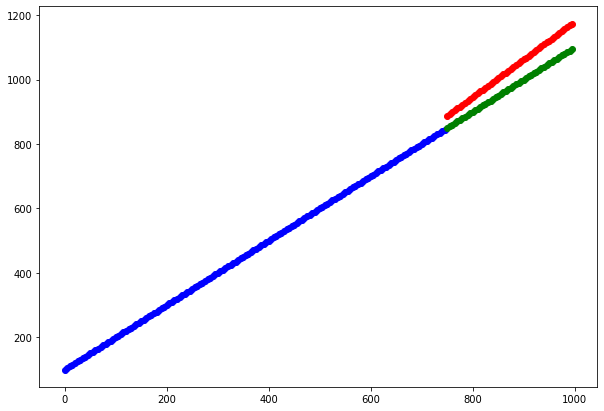

In [ ]:
#Make predictions with trained model
yregpreds = model3.predict(xregtest)

plt.figure(figsize=(10,7))
plt.scatter(xregtrain,yregtrain,c='b',label="Training data")
plt.scatter(xregtest,yregtest,c='g',label="Test data")
plt.scatter(xregtest,yregpreds,c='r',label="Predictions")

In [ ]:
#The missing piece: Non linearity

tf.random.set_seed(42)

model4 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
                              
])

model4.compile(loss = tf.keras.losses.BinaryCrossentropy() ,
               optimizer = tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])


history = model4.fit(x,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

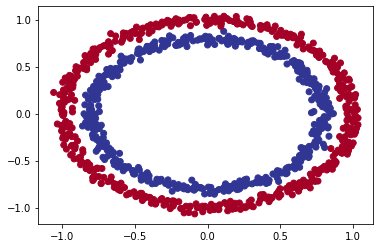

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binary classification


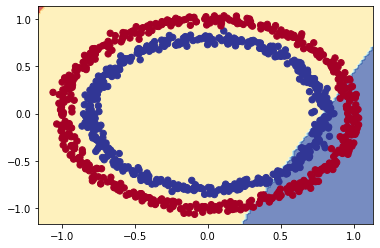

In [ ]:
plot_decision_boundary(model = model4,
                       x=x,
                       y=y)

In [ ]:
#Lets try to build first neural network with a non linear activation function

tf.random.set_seed(42)

#Create a non linear model
model5 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1,activation="relu")
])

model5.compile(loss="BinaryCrossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])
history = model5.fit(x,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [ ]:
#increase hidden layers
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu") ,
                              tf.keras.layers.Dense(1,activation="sigmoid")                          
])

model6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

history=model6.fit(x,y,epochs=250)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [ ]:
model6.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593363776803017, 0.9919999837875366]

doing binary classification


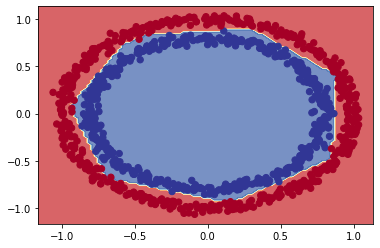

In [ ]:
#How do model predictions look?
plot_decision_boundary(model6,x,y)

In [ ]:
#Create a toy tensor 
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

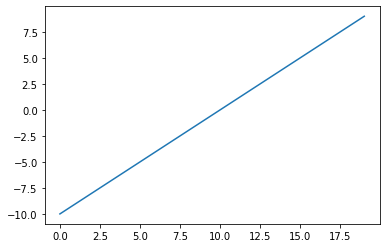

In [ ]:
#Visualize our toy 
plt.plot(A)

In [ ]:
#Lets start by replicating sigmod
def sigmoid(x):
  return 1/(1+tf.exp(-x))

#Use the sigmoid function in toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

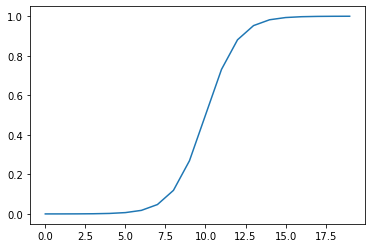

In [ ]:
#Plot toy tensor transormed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
#Lets recreate the relu function
def relu(x):
  return tf.maximum(0,x)

#Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

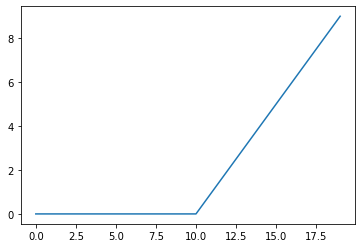

In [ ]:
#Plot relu modified tensor
plt.plot(relu(A))

In [ ]:
#Lets try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

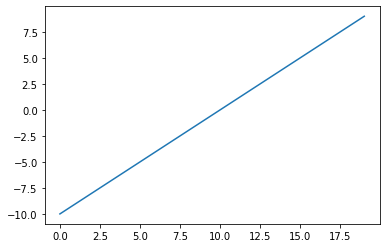

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [ ]:
#Evaluation and improving our classification

len(x)

1000

In [ ]:
x,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
#Split into train and test sets
xtrain,ytrain,xtest,ytest = x[:800],y[:800],x[800:],y[800:]

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
#Lets recreate a model to fit on the training data and evaluate on the testing data
tf.random.set_seed(42)

model7 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

model7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["accuracy"])

history = model7.fit(xtrain,ytrain,epochs=25)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [ ]:
model7.evaluate(xtest,ytest)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


<function matplotlib.pyplot.show>

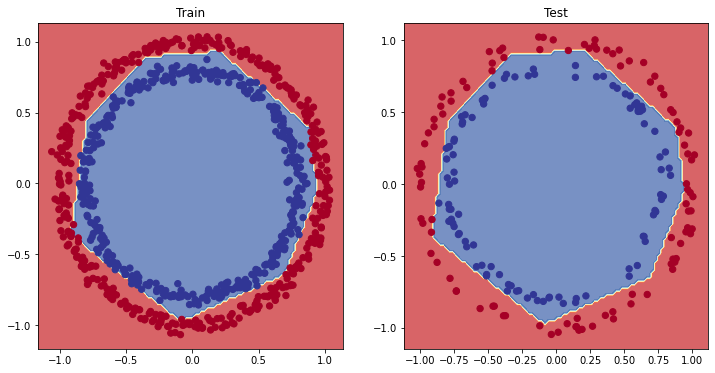

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model7,x=xtrain,y=ytrain)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model7,xtest,ytest)
plt.show

In [ ]:
#Plot the loss(or training) curve
#Lets convert history to dataframe

pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, "'Model8 loss curves")

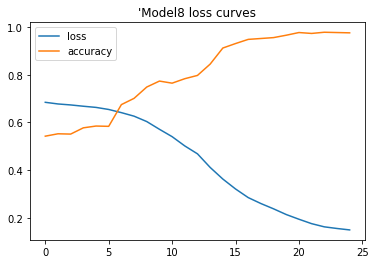

In [ ]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("'Model8 loss curves")

In [ ]:
#Finding the best learning rate

tf.random.set_seed(42)

model9 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid"),
])

model9.compile(loss="binary_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history9 = model9.fit(xtrain,ytrain,epochs=100,callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

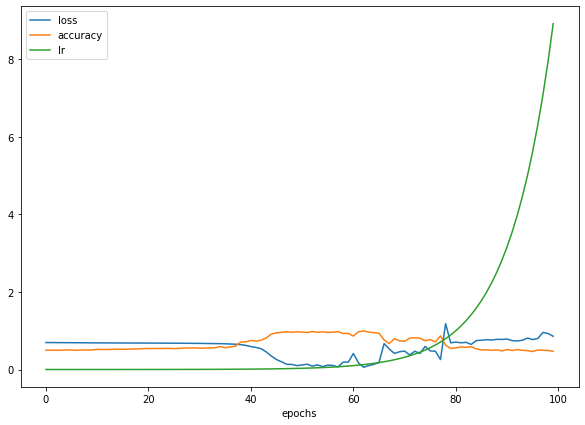

In [ ]:
#Checkout the history
pd.DataFrame(history9.history).plot(figsize=(10,7),xlabel="epochs")

In [ ]:
#Plot the learning rate vs loss
lrs = 1e-4*(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs loss')

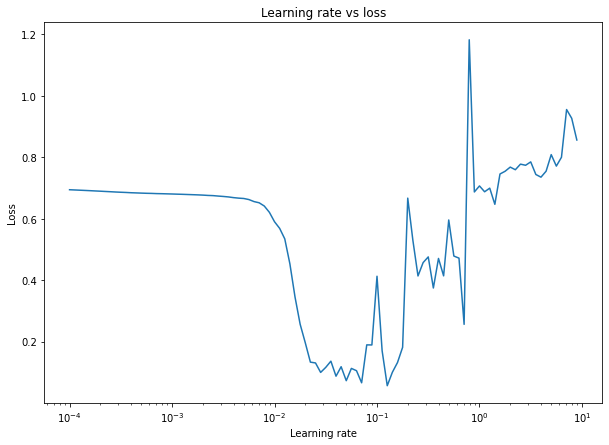

In [ ]:
#Find ideal learning rate
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [ ]:
#Lets try using a higher ideal learning rate with same model


tf.random.set_seed(42)

model10 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid"),
])

model10.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.02),
               metrics=["accuracy"])

history10 = model10.fit(xtrain,ytrain,epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
model10.evaluate(xtest,ytest)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [ ]:
model7.evaluate(xtest,ytest)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


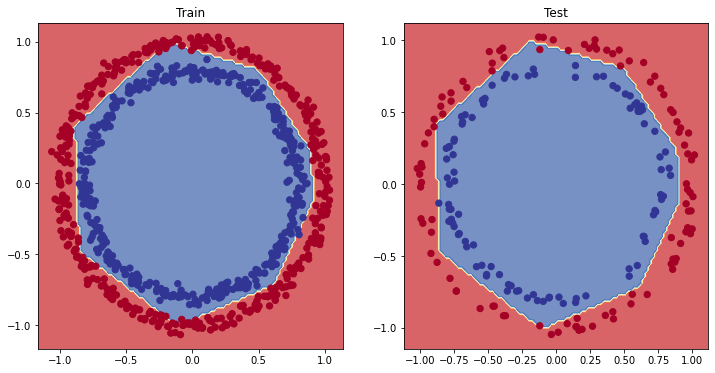

In [ ]:
#Plot the decision boundaries for train and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model10,xtrain,ytrain)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model10,xtest,ytest)
plt.show()

In [ ]:
#More classification evaluation methods

#Check the accuracy of our model
loss,accuracy = model10.evaluate(xtest,ytest)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set:0.05740184709429741
Model accuracy on the test set:99.00%


In [ ]:
'''#Confusion matrix

from sklearn.metrics import confusion_matrix

ypreds = model10.predict(xtest)

confusion_matrix(ytest,ypreds)'''

'#Confusion matrix\n\nfrom sklearn.metrics import confusion_matrix\n\nypreds = model10.predict(xtest)\n\nconfusion_matrix(ytest,ypreds)'

In [ ]:
ytest[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
ypreds = model10.predict(xtest)
ypreds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [ ]:
#Convert our predictions prob to binary format 
tf.round(ypreds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,tf.round(ypreds))

array([[99,  2],
       [ 0, 99]])

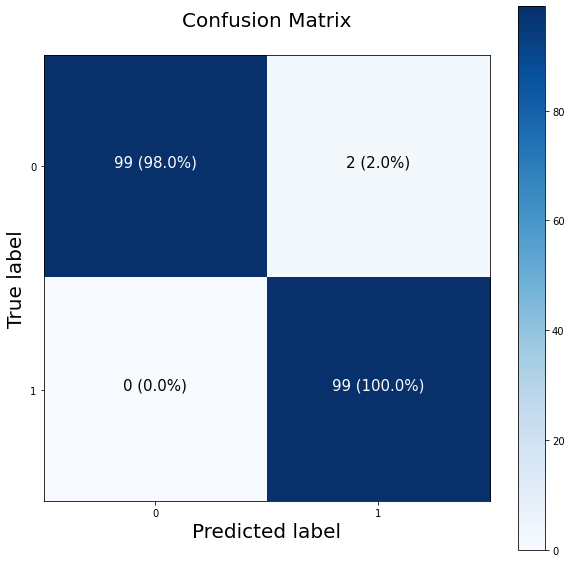

In [ ]:
import itertools
figsize = (10,10)

#Create the confusion matrix
cm  =  confusion_matrix(ytest,tf.round(ypreds))
cmnorm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

#Lets prettify it
fig,ax = plt.subplots(figsize=figsize)

#Create a matrix plot
cax = ax.matshow(cm,cmap =plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#Set x axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set the threshold
threshold = (cm.max()+cm.min()) / 2.

#Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cmnorm[i,j]*100:.1f}%)",
  horizontalalignment="center",
  color="white" if cm[i,j]>threshold else "black",
  size=15)


In [ ]:
#Working with a larger example(multiclass classification)

import tensorflow as tf
from tensorflow.keras.datasets import  fashion_mnist

#The data has already been sorted into train and test
(traindata,trainlabels),(testdata,testlabels) = fashion_mnist.load_data()


In [ ]:
#Show the training ex
print(f"Training sample:\n{traindata[0]}\n")
print(f"Training label:\n{trainlabels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#Check the shape of a single example
traindata[0].shape,trainlabels[0].shape

((28, 28), ())

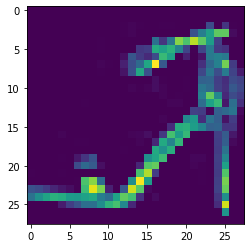

In [ ]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(traindata[8])

In [ ]:
#Check out sample labels
trainlabels[8]

5

In [ ]:
#Create a small lst so we can index onto our training labels so they are human readbale

classnames = ["T-shirt/top", "Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag","Ankle boot"]
len(classnames)

10

Text(0.5, 1.0, 'Bag')

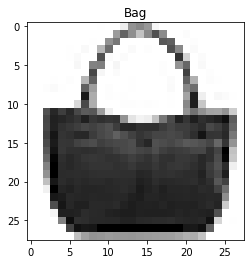

In [ ]:
#Plot an example image and its labe
ioc=100
plt.imshow(traindata[ioc],cmap=plt.cm.binary)
plt.title(classnames[trainlabels[ioc]])

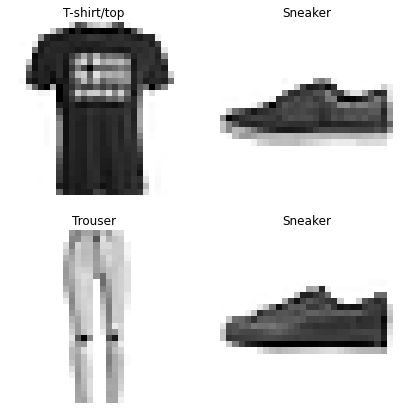

In [ ]:
#Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  randindex = random.choice(range(len(traindata)))
  plt.imshow(traindata[randindex],cmap = plt.cm.binary)
  plt.title(classnames[trainlabels[randindex]])
  plt.axis(False)

In [ ]:
#Building a multi class classification model

traindata[0].shape

(28, 28)

In [ ]:
len(classnames)

10

In [ ]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
tf.one_hot(trainlabels[:10],depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)

model11 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax"),
])

model11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

non_norm_history = model11.fit(traindata,
                               tf.one_hot(trainlabels,depth=10),
                               epochs=10,
                               validation_data=(testdata,tf.one_hot(testlabels,depth=10)))



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
model11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_25 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Check the min and  max values of the training data
traindata.min(),traindata.max()

(0, 255)

In [ ]:
#Normalization of data

traindatanorm = traindata/traindata.max()
testdatanorm = testdata/255.0

In [ ]:
traindatanorm.min(),traindatanorm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model12 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax"),
])

model12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

norm_history = model12.fit(traindatanorm,
                               trainlabels,
                               epochs=10,
                               validation_data=(testdatanorm,testlabels))



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

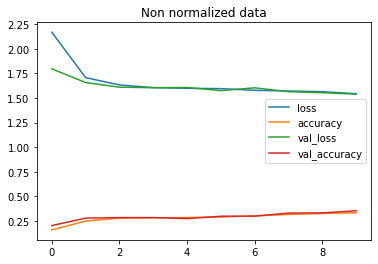

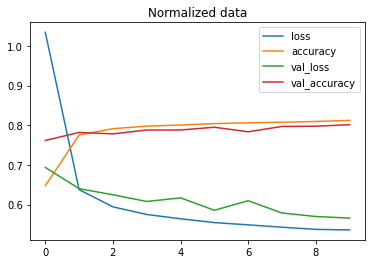

In [ ]:
import pandas as pd
#Plot the non normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non normalized data")

pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [ ]:
tf.random.set_seed(42)

model13 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax"),
])

model13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10 **(epoch/20))

find_lr_history = model13.fit(traindatanorm,
                               trainlabels,
                               epochs=40,
                               validation_data=(testdatanorm,testlabels),
                               callbacks=[lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

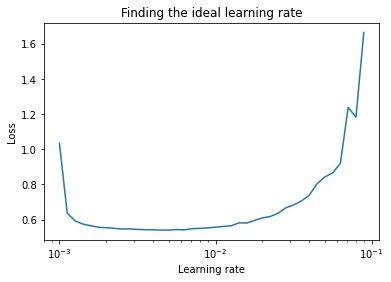

In [ ]:
#Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
10**-3

0.001

In [ ]:
#Lets refit a model with the ideal learning rate

tf.random.set_seed(42)

model14 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax"),
])

model14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history14 = model14.fit(traindatanorm,
                               trainlabels,
                               epochs=20,
                               validation_data=(testdatanorm,testlabels),
                               )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [ ]:
#Evaluating our model

import itertools

def make_confusion_matrix(ytrue,ypred,classes=None,figsize=(10,10),text_size=15):

  #Create the confusion matrix
  cm  =  confusion_matrix(ytrue,ypred)
  cmnorm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  #Lets prettify it
  fig,ax = plt.subplots(figsize=figsize)

  #Create a matrix plot
  cax = ax.matshow(cm,cmap =plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #Set x axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set the threshold
  threshold = (cm.max()+cm.min()) / 2.

  #Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cmnorm[i,j]*100:.1f}%)",
    horizontalalignment="center",
    color="white" if cm[i,j]>threshold else "black",
    size=text_size)


In [ ]:
yprobs =  model14.predict(testdatanorm)

yprobs[:5]


array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [ ]:
testdatanorm[:10],testdata[:10]

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [ ]:
testlabels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
yprobs[0],tf.argmax(yprobs[0]),classnames[tf.argmax(yprobs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
classnames

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Convert all of the prediction prob into integers

ypreds = yprobs.argmax(axis=1)

#View the pred
ypreds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
testlabels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testlabels,ypreds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

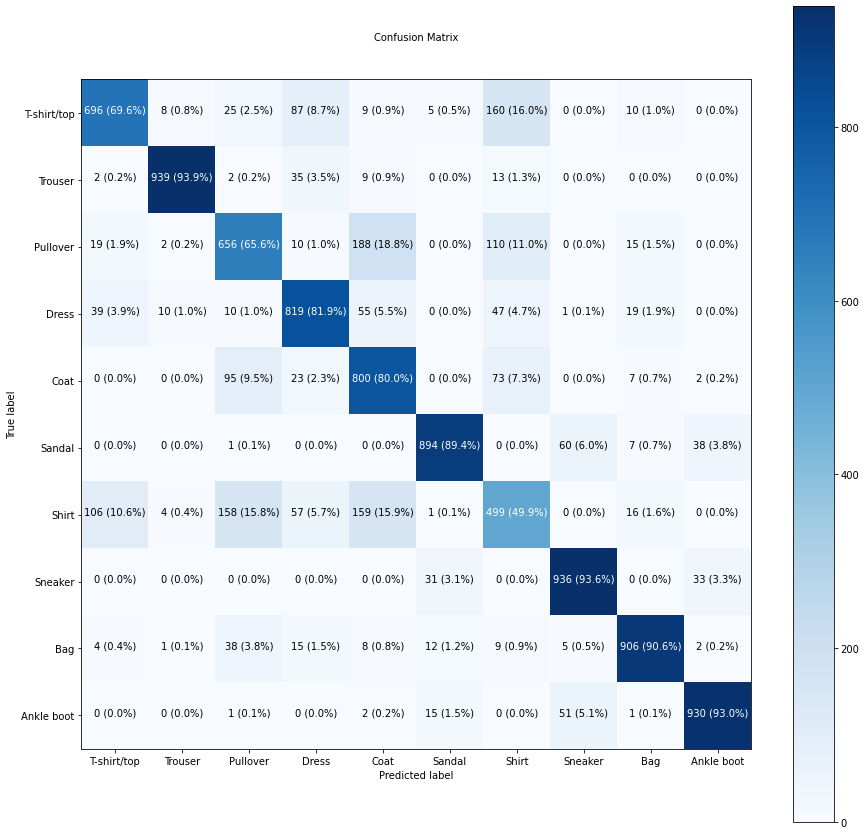

In [ ]:
#Make a prettier confusion matrix
make_confusion_matrix(ytrue = testlabels,
                     ypred = ypreds,
                      classes=classnames,
                      figsize=(15,15),
                      text_size=10
)

In [ ]:
import random

def plot_random_image(model,images,true_labels,classes1):
  #Set up random integer
  i = random.randint(0,len(images))

  #Create predictions and target
  targetimg = images[i]
  pred_probs = model.predict(targetimg.reshape(1,28,28))
  pred_label=classes1[pred_probs.argmax()]
  true_label = classes1[true_labels[i]]

  #Plot the image
  plt.imshow(targetimg,cmap=plt.cm.binary)

  #Change the colour of the titles depending on if the pred is right or wrng
  if pred_label == true_label:
    color = "green"
  else:
    color="red"

    #Add xlabel info
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_labels),
               color=color)

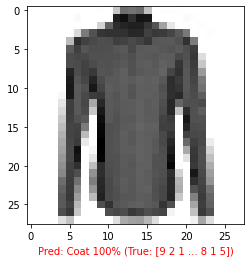

In [ ]:
#Check out a random image as well as its pred
plot_random_image(model=model14,
                  images=testdata,
                  true_labels=testlabels,
                  classes1=classnames)

In [ ]:
#Patterns in our model
#Find the layers of our most recent model
model14.layers

In [ ]:
#Extract a particular layer
model14.layers[1]

In [ ]:
#Get the patterns of a layer in our network
weights,biases = model14.layers[1].get_weights()

weights,weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [ ]:
model14.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_33 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_34 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Lets check out bias vector

#Bias and biases shapes

biases,biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

In [ ]:
#Check once the github code and this

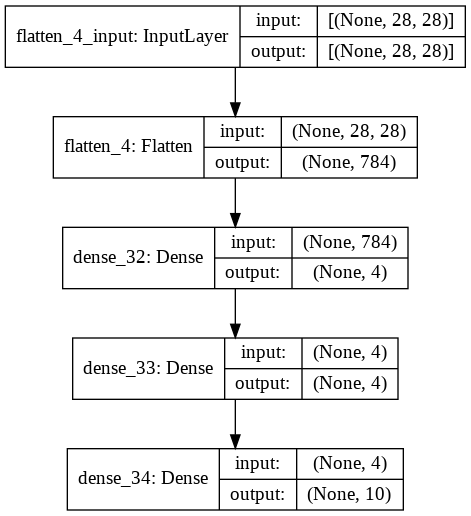

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model14,show_shapes=True)